# DFT

In [23]:
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import glob

# Introduction
In this project we will be implementing the Dicrete Fourier Transform of images and analyze the execution time of the  image to see how long it takes to implemented this transform

# Method
To computer the Discrete Fourier we must use the equation below. Then we must apply it to an image and we will be able to see the frequency domain of image

In [24]:
display(Math(r'F(u,v) = 1/MN \sum_{i=0}^{M-1} \sum_{i=0}^{N-1} f(m,n)e^{-j2pi(um/M + vn/N)}'))

<IPython.core.display.Math object>

In [2]:
# Image resizing
def average_channel(channel):
    ret = []
    #print(channel.shape)
    for i in range(0,channel.shape[0],2):
        img_row = []
        for j in range(0,channel.shape[1],2):
            #print(channel[i][j])
            #print(channel[i+1][j])
            #print(channel[i][j+1])
            #print(channel[i+1][j+1])
            avg = int(channel[i][j]) + int(channel[i+1][j]) + int(channel[i][j+1]) + int(channel[i+1][j+1])
            #print(avg)
            avg = avg/4
            img_row.append(np.uint8(avg))
        #print(img_row)
        ret.append(img_row)
    
    return np.array(ret)

def reduce_image(image):
    if(len(image.shape) < 3):
        image = image.reshape(image.shape[0],image.shape[1],1)
    if(image.dtype == 'float32'):
        image = image*255
    
    width = image.shape[0]
    height = image.shape[1]
    channels = image.shape[2]
    #print(image.shape[0])
    if((width%2) == 1):
        image = image[:-1,:,:]
        #print(image.shape[0])
        width-=1
        
    if((height%2) == 1):
        image = image[:,:-1,:]
        #print(image.shape[0])
        height-=1
        
    #plt.imshow(image,cmap='gray')
    #plt.show()
    if(channels > 1):
        red = np.reshape(image[...,0],(width,height))
        green = np.reshape(image[...,1],(width,height))
        blue = np.reshape(image[...,2],(width,height))
    elif(channels==1):
        red = np.reshape(image[...,0],(width,height))
        green = np.reshape(image[...,0],(width,height))
        blue = np.reshape(image[...,0],(width,height))
    else:
        raise Exception("Invalid image channels")
        
    average_red = average_channel(red)
    average_green = average_channel(green)
    average_blue = average_channel(blue)
    #ret = np.append(np.reshape(average_red,(average_red.shape[0],average_red.shape[1],1)),np.reshape(average_red,(average_red.shape[0],average_red.shape[1],1)),axis=-1)
    #ret = np.append(ret,np.reshape(average_red,(average_red.shape[0],average_red.shape[1],1)),axis=-1)
    ret = np.append(np.reshape(average_red,(average_red.shape[0],average_red.shape[1],1)),np.reshape(average_green,(average_green.shape[0],average_green.shape[1],1)),axis=-1)
    ret = np.append(ret,np.reshape(average_blue,(average_blue.shape[0],average_blue.shape[1],1)),axis=-1)
    return ret
    
    

In [3]:
def display_DFT(computed_DFT):
    return np.sqrt(np.square(computed_DFT[0])  +  np.square(computed_DFT[1]))
def scale_display(disp):
    maximum = np.max(disp)
    return ((255/np.log10(255))*np.log10(1+(255/maximum)*disp)).astype('int32')

In [4]:
def DFT_channel(x):
    """Compute the 2D discrete Fourier Transform of the input image"""
    N = x.shape[0]
    M = x.shape[1]
    u = np.arange(N)
    ku = u.reshape((N, 1))
    v = np.arange(N)
    kv = v.reshape((M, 1))
    Mu = np.exp(-2j * np.pi * ku * u / N)
    Mv = np.exp(-2j * np.pi * kv * v / N)
    return np.dot(np.dot(Mu, x),Mv)

def DFT_centered(x):
    """Compute the centered 2D discrete Fourier Transform of the input image"""
    N = x.shape[0]
    M = x.shape[1]
    u = np.arange(N)
    ku = u.reshape((N, 1))
    v = np.arange(N)
    kv = v.reshape((M, 1))
    Mu = np.exp(-2j * np.pi * ku * u / N)
    Mv = np.exp(-2j * np.pi * kv * v / N)
    return np.dot(np.dot(Mu, x),Mv)#*((-1)**(np.reshape(np.arange(N),(N,1)) * np.arange(N)))


In [5]:
def DFT(image,centered = True):
    if(len(image.shape) < 3):
        image = image.reshape(image.shape[0],image.shape[1],1)
    if(image.dtype == 'float32'):
        image = image*255
    
    width = image.shape[0]
    height = image.shape[1]
    channels = image.shape[2]

    if(channels > 1):
        red = np.reshape(image[...,0]/255,(width,height))
        green = np.reshape(image[...,1]/255,(width,height))
        blue = np.reshape(image[...,2]/255,(width,height))
    elif(channels==1):
        red = np.reshape(image[...,0],(width,height))
        green = np.reshape(image[...,0],(width,height))
        blue = np.reshape(image[...,0],(width,height))
    else:
        raise Exception("Invalid image channels")
    
    if(not centered):
        Transformed_red = DFT_channel(red)
        Transformed_green = DFT_channel(green)
        Transformed_blue = DFT_channel(blue)
        #print(Transformed_red.shape)
    else:
        Transformed_red = DFT_centered(red)
        Transformed_green = DFT_centered(green)
        Transformed_blue = DFT_centered(blue)
        #print(Transformed_red.shape)  
    
    #Real_red = Transformed_red[...,0]
    #Real_green = Transformed_green[...,0]
    #Real_blue = Transformed_blue[...,0]

    #Imag_red = Transformed_red[...,1]
    #Imag_green = Transformed_green[...,1]
    #Imag_blue = Transformed_blue[...,1]
    
    ret = np.append(np.reshape(Transformed_red,(Transformed_red.shape[0],Transformed_red.shape[1],1)),np.reshape(Transformed_green,(Transformed_green.shape[0],Transformed_green.shape[1],1)),axis=-1)
    ret = np.append(ret,np.reshape(Transformed_blue,(Transformed_blue.shape[0],Transformed_blue.shape[1],1)),axis=-1)
    #ret_real = np.append(np.reshape(Real_red,(Real_red.shape[0],Real_red.shape[1],1)),np.reshape(Real_green,(Real_green.shape[0],Real_green.shape[1],1)),axis=-1)
    #ret_real = np.append(ret_real,np.reshape(Real_blue,(Real_blue.shape[0],Real_blue.shape[1],1)),axis=-1)
    
    #ret_imag = np.append(np.reshape(Imag_red,(Imag_red.shape[0],Imag_red.shape[1],1)),np.reshape(Imag_green,(Imag_green.shape[0],Imag_green.shape[1],1)),axis=-1)
    #ret_imag = np.append(ret_imag,np.reshape(Imag_blue,(Imag_blue.shape[0],Imag_blue.shape[1],1)),axis=-1)
  
    return ret#np.array([ret_real,ret_imag])

In [20]:
def show(o_img, fft):    
    fig = plt.figure()
    fig.set_figheight(25)
    fig.set_figwidth(25)

    fig.add_subplot(1,2,1)
    plt.imshow(o_img, cmap='gray')

    # display the new image
    fig.add_subplot(1,2,2)
    plt.imshow(fft, cmap='gray')

    

    plt.show(block=True)

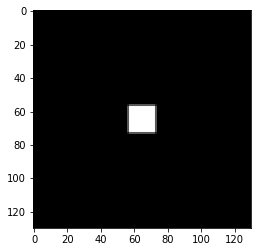

In [7]:
img = plt.imread("imagesHW3/square.png")
plt.imshow(img,cmap='gray')
tansformed_img = DFT(img)


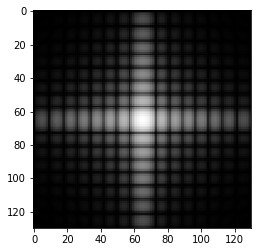

In [8]:
displ = np.sqrt(tansformed_img.real**2 + tansformed_img.imag**2 )
display = scale_display(displ)
display_s = np.fft.fftshift(display)
plt.imshow(display_s,cmap='gray')

In [18]:
ima = []
for filename in glob.glob('imagesHW2/512x512/*.jpg'): #assuming gif
    img = plt.imread(filename)
    ima.append(img)

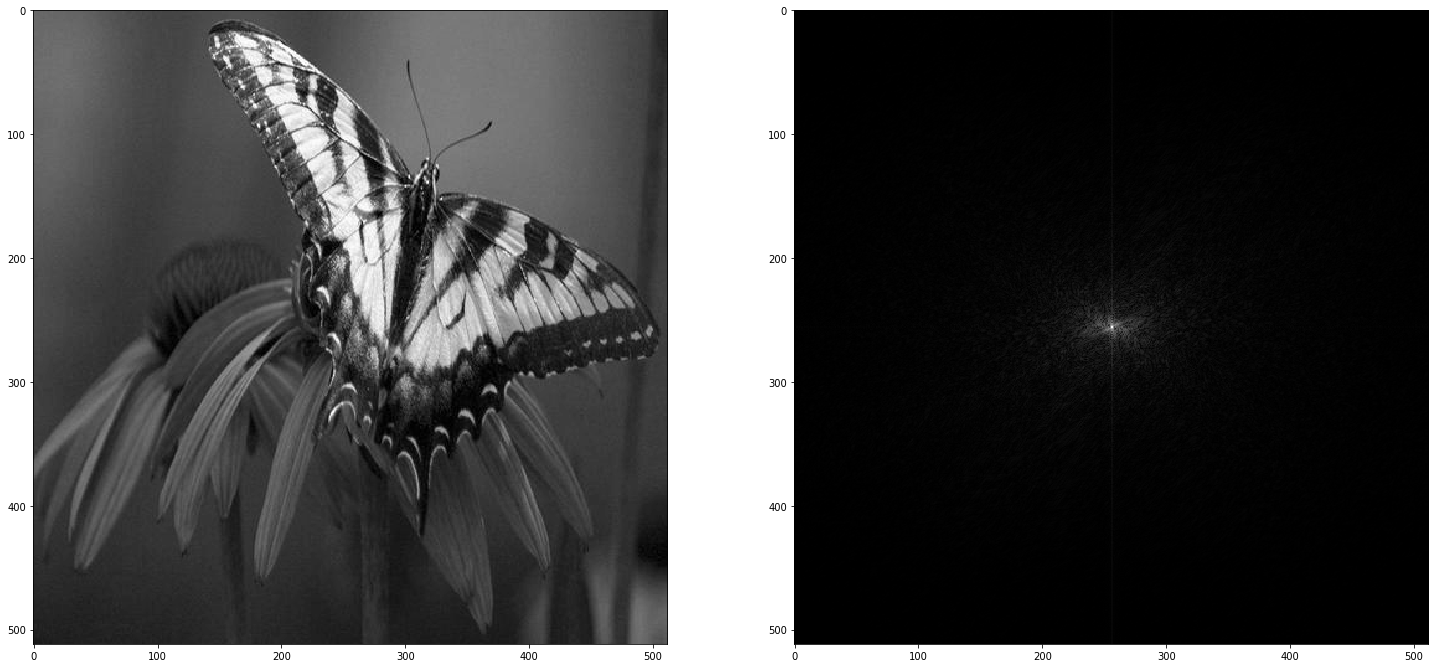

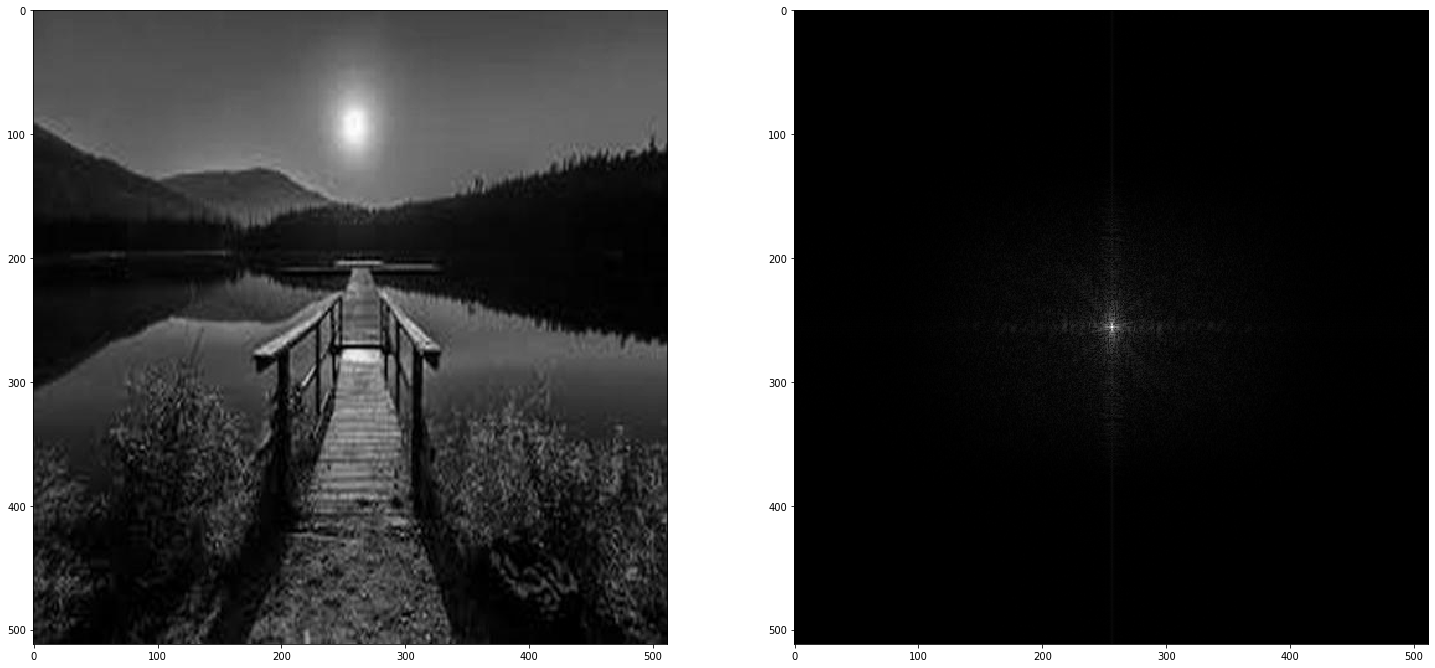

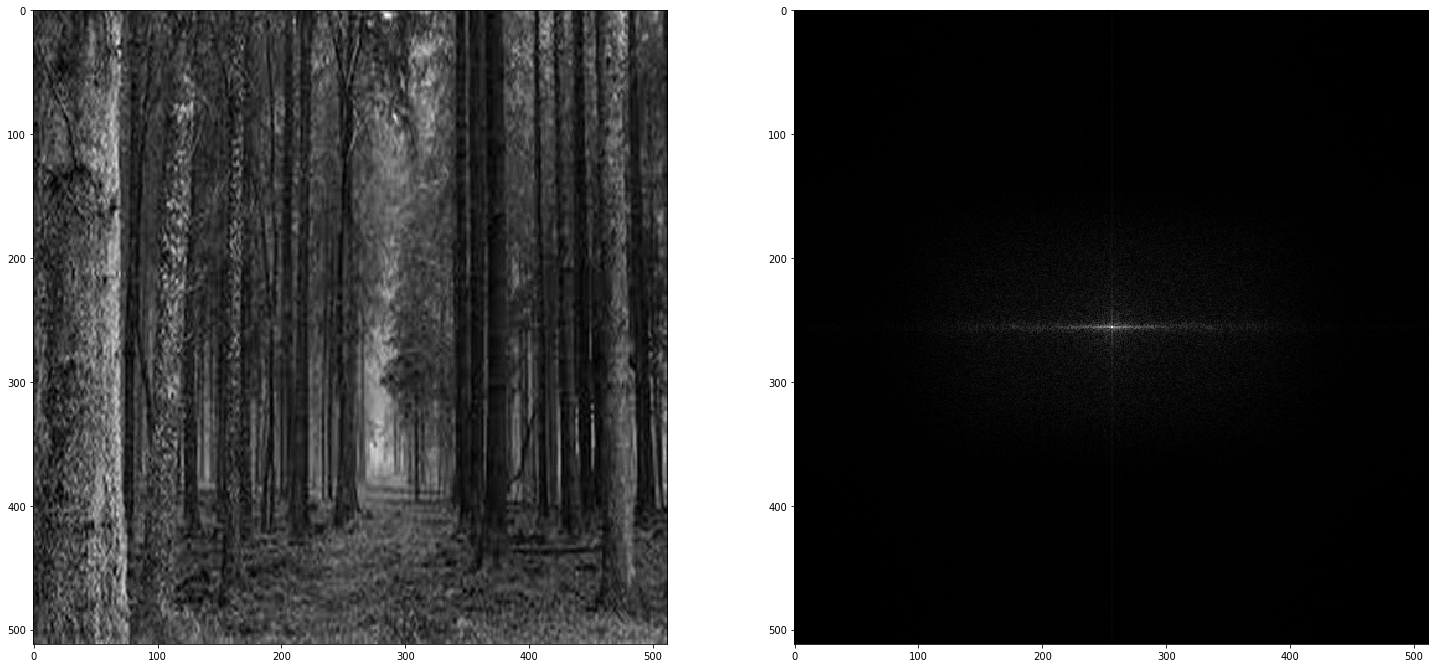

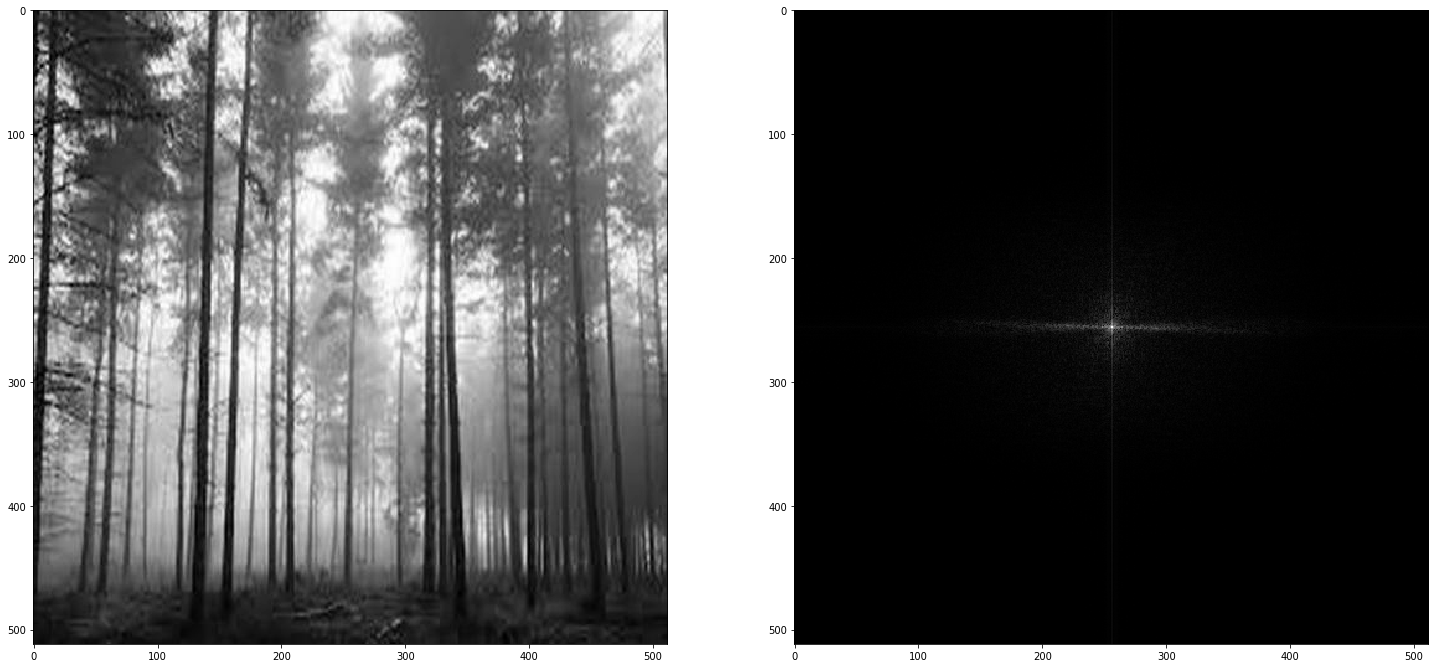

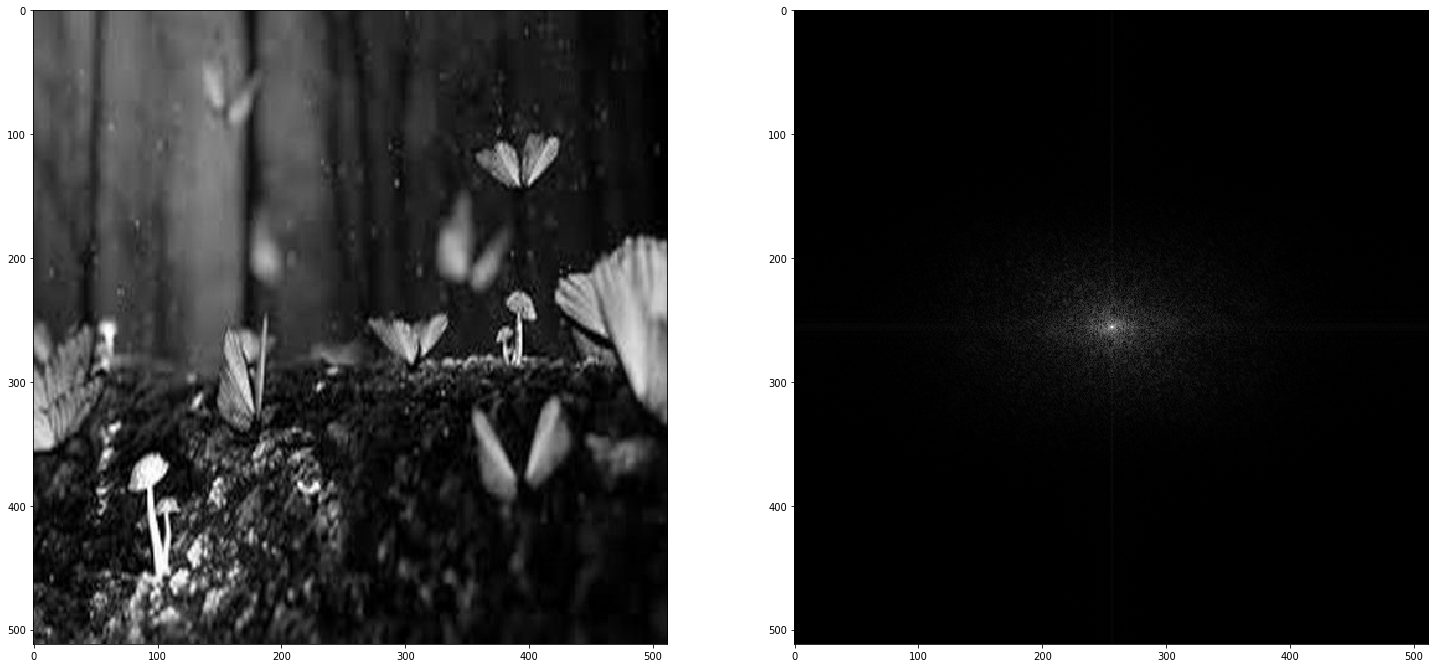

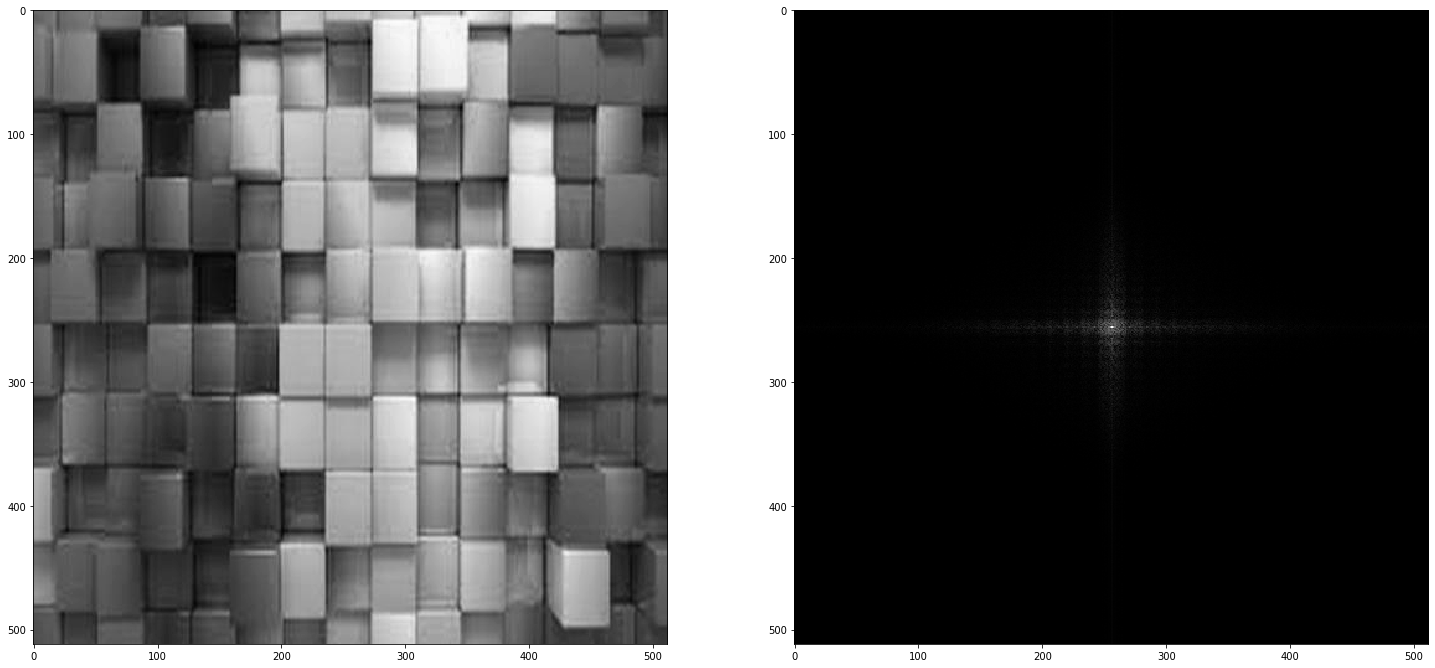

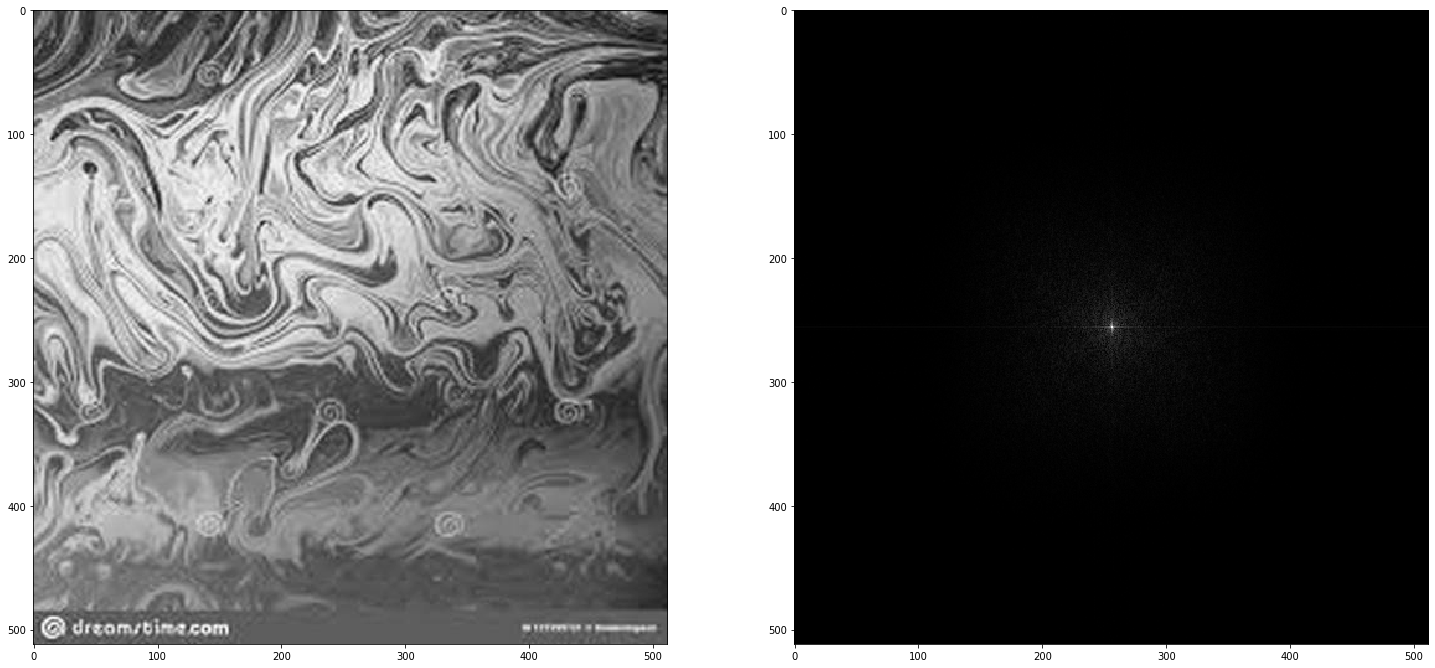

In [22]:
for i in range(len(ima)):
    #plt.imshow(ima[i],cmap='gray')
    tansformed_img = DFT(ima[i])
    displ = np.sqrt(tansformed_img.real**2 + tansformed_img.imag**2 )
    display = scale_display(displ)
    display_s = np.fft.fftshift(display)
    #plt.imshow(display_s,cmap='gray')
    show(ima[i], display_s)

In [ ]:
for i in range(len(ima)):
    #plt.imshow(ima[i],cmap='gray')
    tansformed_img = DFT(ima[i])
    displ = np.sqrt(tansformed_img.real**2 + tansformed_img.imag**2 )
    display = scale_display(displ)
    display_s = np.fft.fftshift(display)
    #plt.imshow(display_s,cmap='gray')
    show(ima[i], display_s)

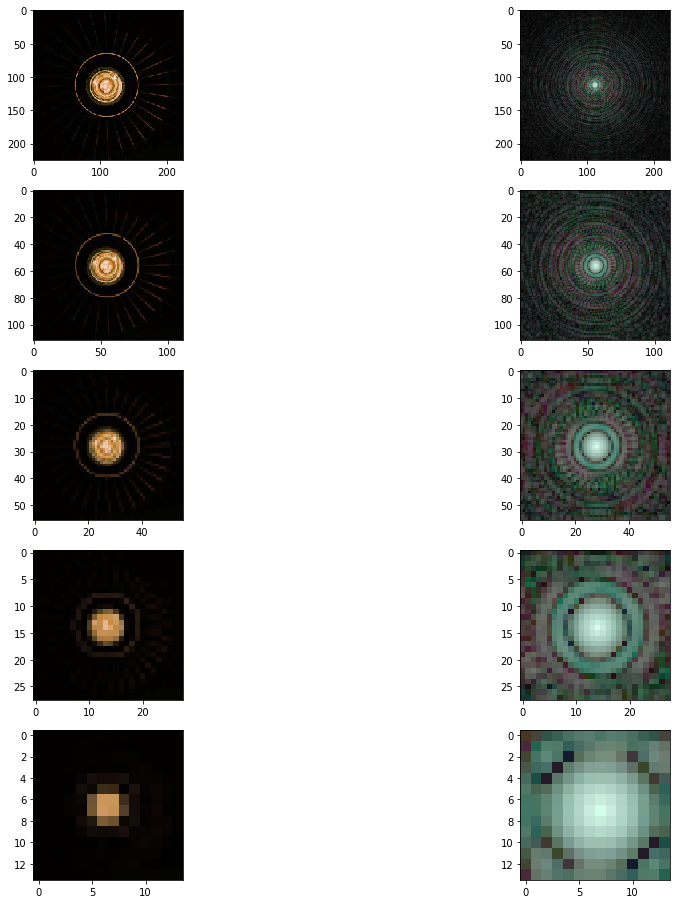

In [11]:
fig = plt.figure(figsize=(16, 16))
columns = 2
rows = 5
times = []

img_1 = plt.imread("imagesHW3/test.jpg")
fig.add_subplot(rows, columns, 1)
plt.imshow(img_1,cmap='gray')

t1 = time.time()
DFT_1 = DFT(img_1)
t2 = time.time()
times.append(t2-t1)
displ = np.sqrt(DFT_1.real**2 + DFT_1.imag**2 )
display = scale_display(displ)
display_s = np.fft.fftshift(display)
fig.add_subplot(rows, columns, 2)
plt.imshow(display_s,cmap='gray')

img_red_1 = reduce_image(img_1)
fig.add_subplot(rows, columns, 3)
plt.imshow(img_red_1,cmap='gray')

t1 = time.time()
DFT_2 = DFT(img_red_1)
t2 = time.time()
times.append(t2-t1)
displ = np.sqrt(DFT_2.real**2 + DFT_2.imag**2 )
display = scale_display(displ)
display_s = np.fft.fftshift(display)
fig.add_subplot(rows, columns, 4)
plt.imshow(display_s,cmap='gray')

img_red_2 = reduce_image(img_red_1)
fig.add_subplot(rows, columns, 5)
plt.imshow(img_red_2,cmap='gray')

t1 = time.time()
DFT_3 = DFT(img_red_2)
t2 = time.time()
times.append(t2-t1)
displ = np.sqrt(DFT_3.real**2 + DFT_3.imag**2 )
display = scale_display(displ)
display_s = np.fft.fftshift(display)
fig.add_subplot(rows, columns, 6)
plt.imshow(display_s,cmap='gray')

img_red_3 = reduce_image(img_red_2)
fig.add_subplot(rows, columns, 7)
plt.imshow(img_red_3,cmap='gray')

t1 = time.time()
DFT_4 = DFT(img_red_3)
t2 = time.time()
times.append(t2-t1)
displ = np.sqrt(DFT_4.real**2 + DFT_4.imag**2 )
display = scale_display(displ)
display_s = np.fft.fftshift(display)
fig.add_subplot(rows, columns, 8)
plt.imshow(display_s,cmap='gray')

img_red_4 = reduce_image(img_red_3)
fig.add_subplot(rows, columns, 9)
plt.imshow(img_red_4,cmap='gray')

t1 = time.time()
DFT_5 = DFT(img_red_4)
t2 = time.time()
times.append(t2-t1)
displ = np.sqrt(DFT_5.real**2 + DFT_5.imag**2 )
display = scale_display(displ)
display_s = np.fft.fftshift(display)
fig.add_subplot(rows, columns, 10)
plt.imshow(display_s,cmap='gray')

plt.show()

In [12]:
for t in times:
    print(t)

0.04300880432128906
0.009015321731567383
0.0020008087158203125
0.0010004043579101562
0.0


In [13]:
times.reverse()

In [14]:
times

[0.0,
 0.0010004043579101562,
 0.0020008087158203125,
 0.009015321731567383,
 0.04300880432128906]

# Results:
As you can see it takes less than a second to process a DFT of size 1024x1024. This was run with the Ryzen 5 2600 CPU paired with an RTX2070 super.

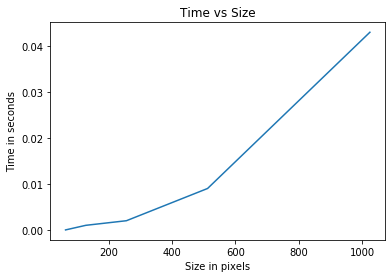

In [15]:
x = [64,128,256,512,1024]
plt.title("Time vs Size") 
plt.xlabel("Size in pixels") 
plt.ylabel("Time in seconds") 
plt.plot(x,times) 
plt.show()

# Conclusion
We have implemented DFT and we can see that the growth rate of the DFT is going to be exponential so the bigger the image the more it will take to process.